How to do?
- ~~matchType~~ (1차 전처리 때 완료)
- rideDistance
- swimDistance
- walkDistance
- weaponsAcquired
- vehicleDestroys
- Feature Importance 찾아보기
<br><br>
Traget column
- winPlacePerc

## Distance

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [3]:
train = pd.read_csv('data/featured_train_2.csv')
train = reduce_mem_usage(train)

In [10]:
distanTest = train.copy()

In [11]:
distanTest = distanTest[['rideDistance','swimDistance','walkDistance','winPlacePerc']]
distanTest.head(5)

,rideDistance,swimDistance,walkDistance,winPlacePerc
0,0.000000,0.000000,244.75,0.444336
1,0.004501,11.039062,1434.00,0.640137
2,0.000000,0.000000,161.75,0.775391
3,0.000000,0.000000,202.75,0.166748
4,0.000000,0.000000,49.75,0.187500


In [14]:
pd.options.display.float_format = '{:.5f}'.format

distanTest.describe()

,rideDistance,swimDistance,walkDistance,winPlacePerc
count,4446965.00000,4446965.00000,4446965.00000,4446965.00000
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.00000
min,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,155.12500,0.19995
50%,0.00000,0.00000,685.50000,0.45825
75%,0.19104,0.00000,1976.00000,0.74072
max,40704.00000,3824.00000,25776.00000,1.00000


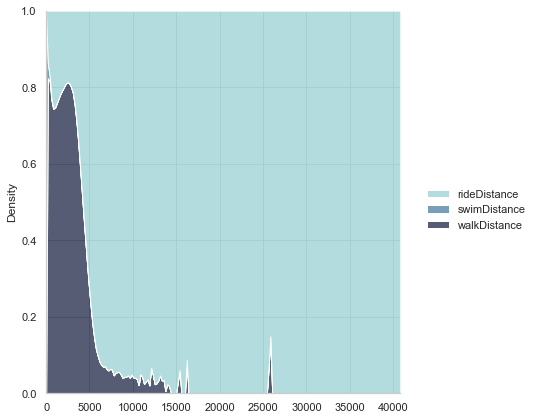

In [19]:
sns.set_theme(style="whitegrid")

seatest = distanTest.drop(columns=['winPlacePerc'])

# Load the diamonds dataset
diamonds = seatest

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=seatest,
   
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)